In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline

In [2]:
## read from previously saved pickle file
df = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/clean.pkl')
#drop these two columns because not useful
df.drop(['yr_born', 'yr_died'], axis=1, inplace=True)

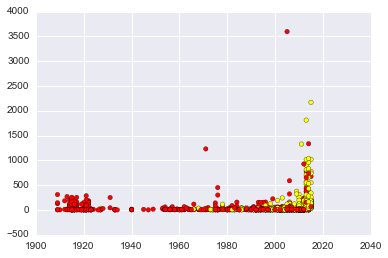

In [3]:
features = ['yrpub', 'numlines','numstanzas' ,'avgline_stanza','enj_score','ttr',
             'abstraction_score', 'lesk_abs_score', 'pronoun_score', 'title_lesk_abs', 'conjunction_ratio',
             'nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore','avg_vps_cscore','avg_aps_cscore',
             '1_w_nps_fr','2_w_nps_fr','3_w_nps_fr','4_w_nps_fr','5_w_nps_fr','6_w_nps_fr','7_w_nps_fr',
             '8_w_nps_fr','9_w_nps_fr','10_w_nps_fr','11_w_nps_fr','12_w_nps_fr','13_w_nps_fr', '14_w_nps_fr',
             '15_w_nps_fr','16_w_nps_fr'
            ]

X = df[features]
Y = df['label']

plt.scatter(X[features[0]],X[features[4]], c=Y, cmap='autumn')

##get rid of outliers, lets drop them

In [4]:
df = df.query('numlines < 500')
df = df.query('enj_score < 1400')
df = df.query('numstanzas < 100')
df = df.query('avgline_stanza < 150')
df = df.query('title_lesk_abs < 2.0')
df = df.query('conjunction_ratio < 100')

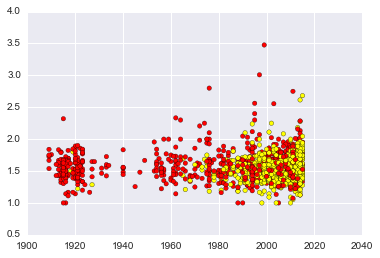

In [5]:
X = df[features]
Y = df['label']

plt.scatter(X[features[0]],X[features[14]], c=Y, cmap='autumn')

In [97]:
df.columns

Index([u'yrpub', u'numlines', u'numstanzas', u'avgline_stanza', u'enj_score',
       u'ttr', u'abstraction_score', u'lesk_abs_score', u'pronoun_score',
       u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio', u'vps_ratio',
       u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore', u'avg_aps_cscore',
       u'1_w_nps_fr', u'2_w_nps_fr', u'3_w_nps_fr', u'4_w_nps_fr',
       u'5_w_nps_fr', u'6_w_nps_fr', u'7_w_nps_fr', u'8_w_nps_fr',
       u'9_w_nps_fr', u'10_w_nps_fr', u'11_w_nps_fr', u'12_w_nps_fr',
       u'13_w_nps_fr', u'14_w_nps_fr', u'15_w_nps_fr', u'16_w_nps_fr',
       u'label'],
      dtype='object')

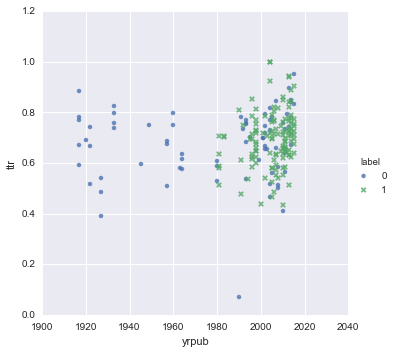

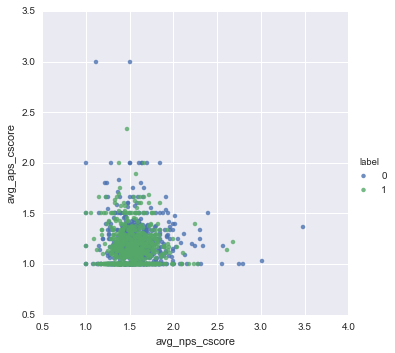

In [113]:
sns.lmplot('yrpub','ttr', data = df[100:300], hue = 'label', markers=["o", "x"], fit_reg = False)
sns.lmplot('avg_nps_cscore','avg_aps_cscore', data = df, hue = 'label', fit_reg = False)

In [83]:
df.columns[17:]
colstodrop = ['4_w_nps_fr','5_w_nps_fr','6_w_nps_fr','7_w_nps_fr','8_w_nps_fr','9_w_nps_fr','10_w_nps_fr','11_w_nps_fr','12_w_nps_fr'
             ,'13_w_nps_fr','14_w_nps_fr','15_w_nps_fr','16_w_nps_fr']

df2 = df.drop(colstodrop, axis=1)

df2.columns

Index([u'yrpub', u'numlines', u'numstanzas', u'avgline_stanza', u'enj_score',
       u'ttr', u'abstraction_score', u'lesk_abs_score', u'pronoun_score',
       u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio', u'vps_ratio',
       u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore', u'avg_aps_cscore',
       u'1_w_nps_fr', u'2_w_nps_fr', u'3_w_nps_fr', u'label'],
      dtype='object')

In [84]:
df2['label2'] = df2['label'].map(lambda x: 'contemporary' if x == 1 else 'not contemporary')
df2.drop('label', axis = 1, inplace = True)

Index([u'yrpub', u'numlines', u'numstanzas', u'avgline_stanza', u'enj_score',
       u'ttr', u'abstraction_score', u'lesk_abs_score', u'pronoun_score',
       u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio', u'vps_ratio',
       u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore', u'avg_aps_cscore',
       u'1_w_nps_fr', u'2_w_nps_fr', u'3_w_nps_fr', u'label2'],
      dtype='object')


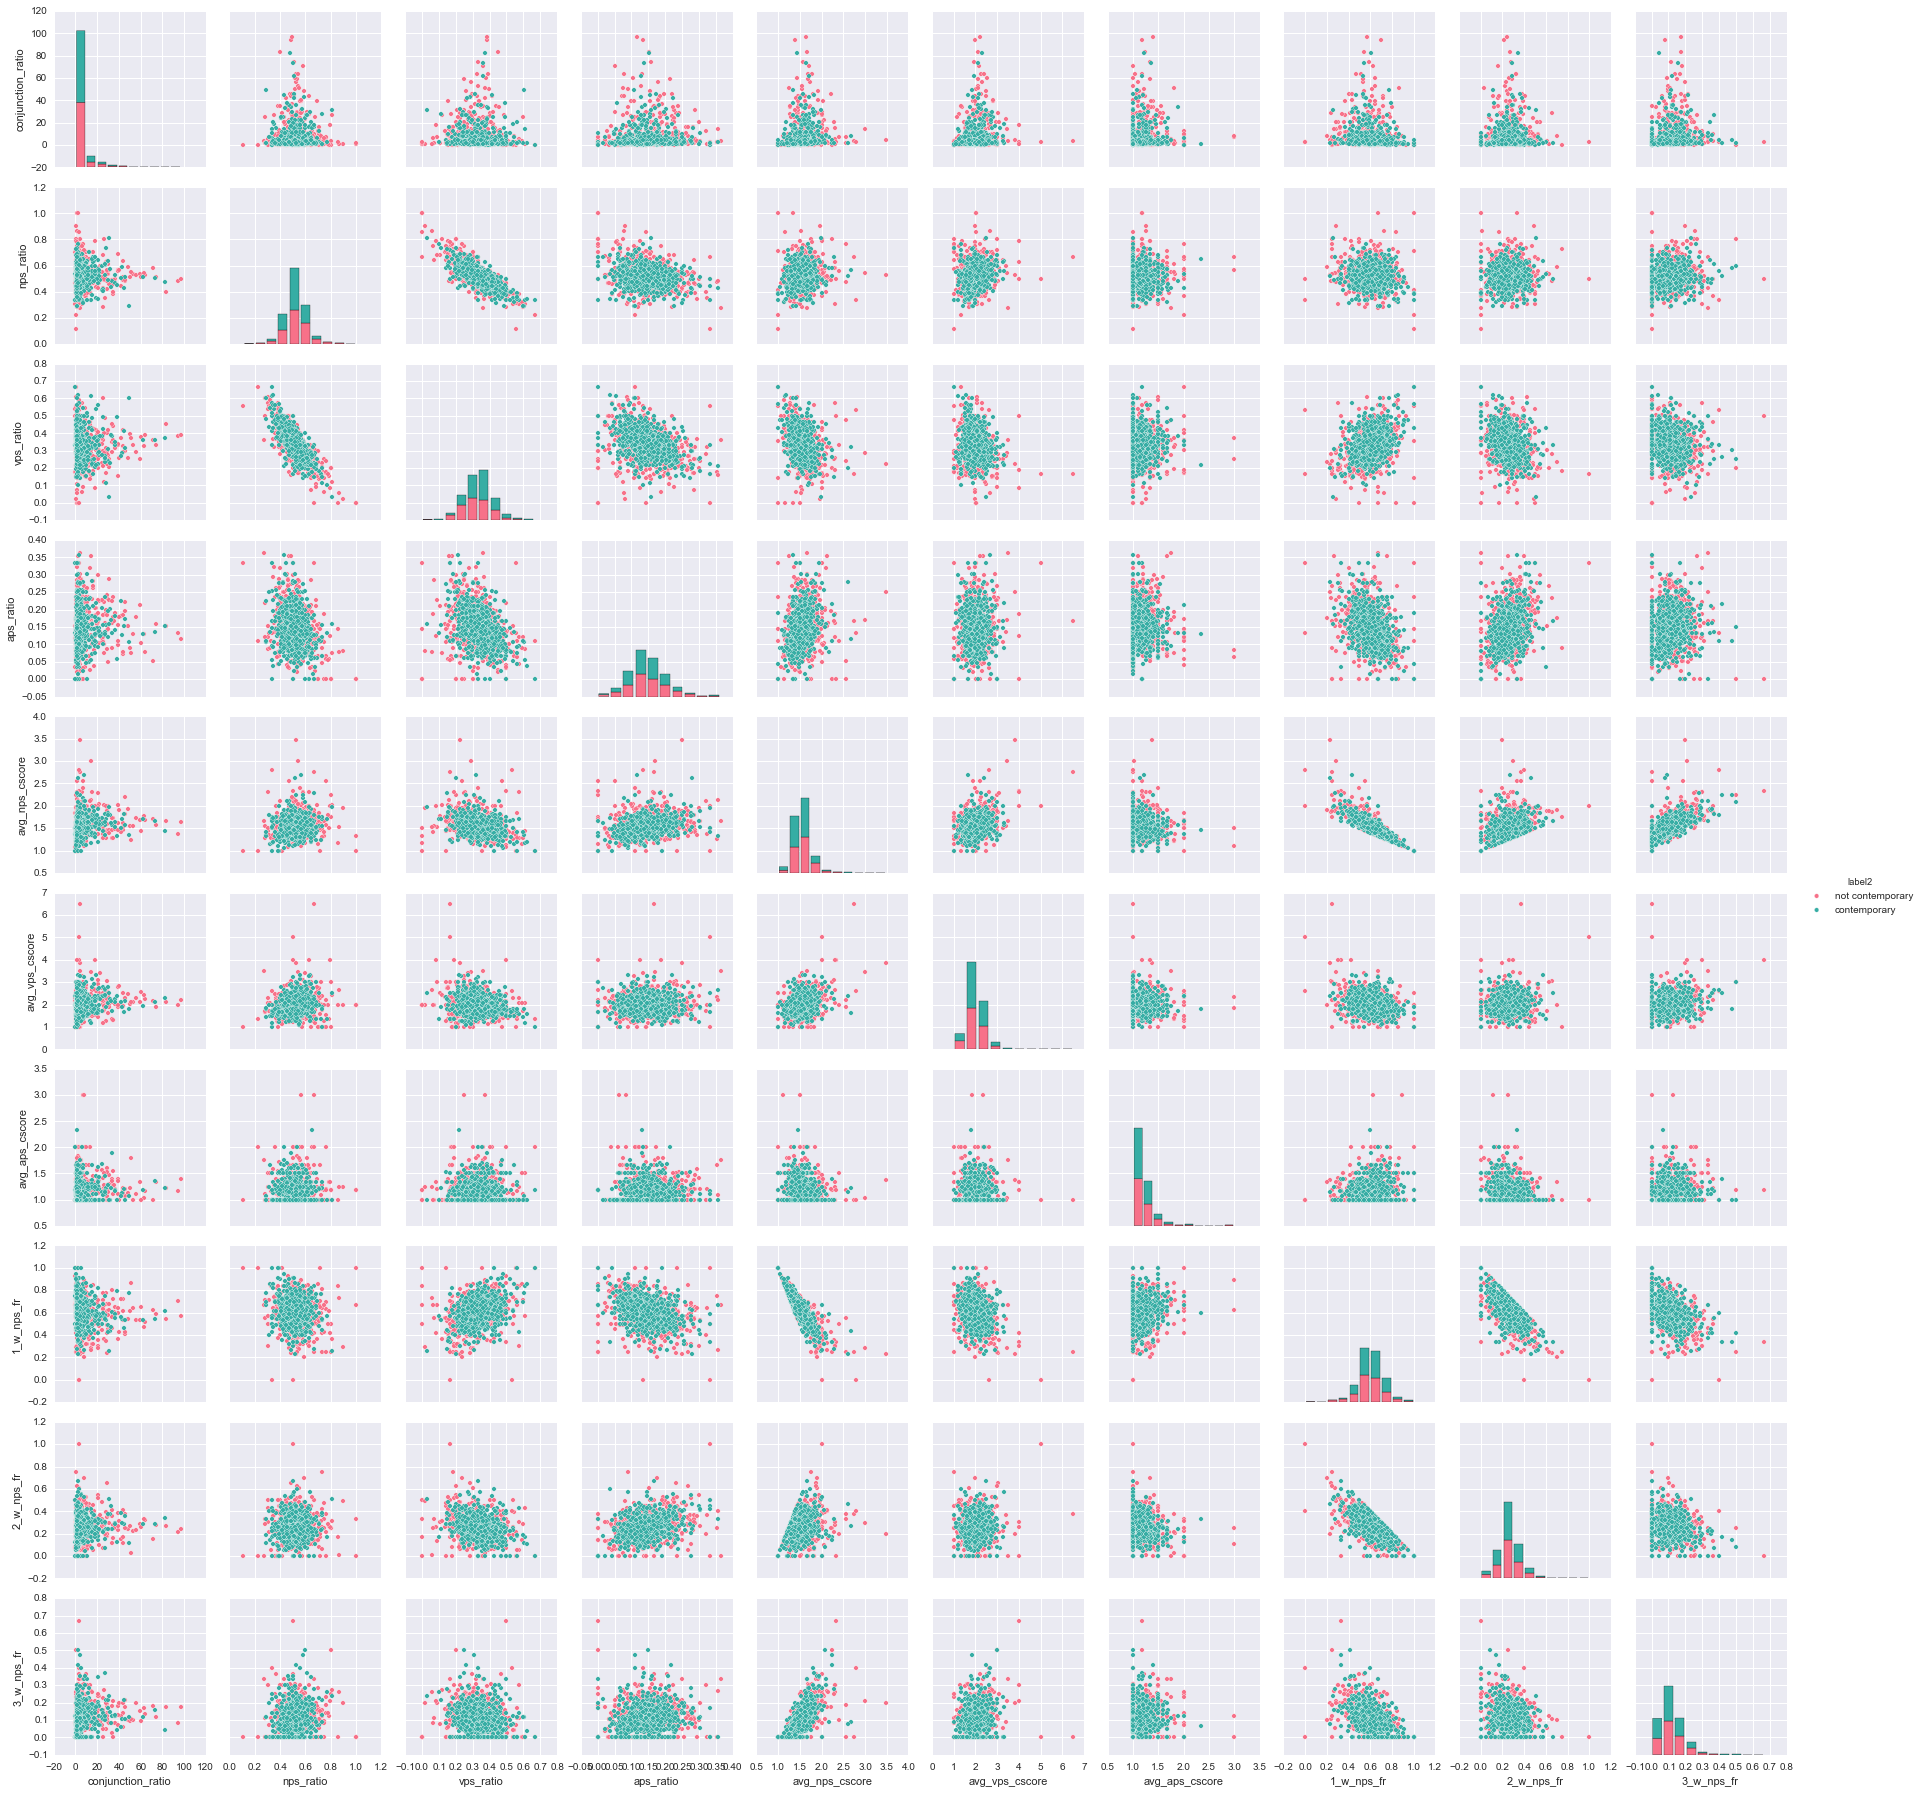

In [91]:
print df2.columns

a = df2.ix[:, 10:]
sns.pairplot(a, hue= 'label2', palette='husl')

In [99]:
wholedf = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/labeleddf.pkl')
wholedf.head()

cols = ['primary_tag', 'label','yrpub', 'numlines','numstanzas' ,'avgline_stanza','enj_score','ttr',
             'abstraction_score', 'lesk_abs_score', 'pronoun_score', 'title_lesk_abs', 'conjunction_ratio',
             'nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore','avg_vps_cscore','avg_aps_cscore',
             '1_w_nps_fr','2_w_nps_fr','3_w_nps_fr','4_w_nps_fr','5_w_nps_fr','6_w_nps_fr','7_w_nps_fr',
             '8_w_nps_fr','9_w_nps_fr','10_w_nps_fr','11_w_nps_fr','12_w_nps_fr','13_w_nps_fr', '14_w_nps_fr',
             '15_w_nps_fr','16_w_nps_fr'
            ]

In [101]:
whole = wholedf[cols]

In [102]:
#getrid of outliers
whole = whole.query('numlines < 500')
whole = whole.query('enj_score < 1400')
whole = whole.query('numstanzas < 100')
whole = whole.query('avgline_stanza < 150')
whole = whole.query('title_lesk_abs < 2.0')
whole = whole.query('conjunction_ratio < 100')

len(whole)

1439

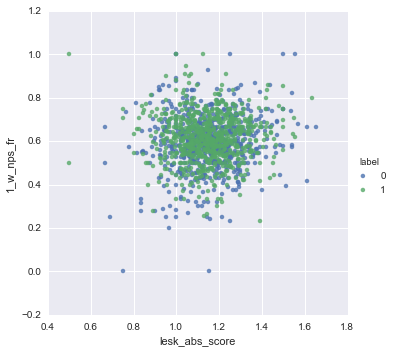

In [112]:
sns.lmplot('lesk_abs_score','1_w_nps_fr', data = whole, hue = 'label', fit_reg = False)